**Câu 1. Tạo dataframe (df) lưu trữ dataset tại đường dẫn trên (chọn cách đọc load từ
internet). Xuất 10 samples bất kỳ. Dataset có bao nhiêu sample, số lượng bao
nhiêu feature.**

In [1]:
import pandas as pd
import io
from io import BytesIO
from urllib.request import Request, urlopen
link = 'https://raw.githubusercontent.com/datasethub/ds105/master/EDA_automobile.csv'
url = Request(link, headers={'User-Agent': 'Mozilla/5.0'})
df = pd.read_csv(BytesIO(urlopen(url).read()))
df.sample(10)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450,13.055556,Medium,0,1
62,0,118,mazda,std,four,sedan,rwd,front,104.9,0.840942,0.918056,54.4,2670,ohc,four,140,mpfi,3.76,3.16,8.0,120.0,5000.0,19,27,18280,12.368421,Medium,0,1
91,1,128,nissan,std,two,sedan,fwd,front,94.5,0.794330,0.886111,54.5,1951,ohc,four,97,2bbl,3.15,3.29,9.4,69.0,5200.0,31,37,7299,7.580645,Low,0,1
15,0,122,bmw,std,two,sedan,rwd,front,103.5,0.931283,0.943056,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315,14.687500,High,0,1
149,0,77,toyota,std,four,wagon,fwd,front,95.7,0.815473,0.883333,59.1,2280,ohc,four,92,2bbl,3.05,3.03,9.0,62.0,4800.0,31,37,6918,7.580645,Low,0,1
125,3,122,porsche,std,two,convertible,rwd,rear,89.5,0.811629,0.902778,51.6,2800,ohcf,six,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,37028,13.823529,High,0,1
139,0,102,subaru,std,four,sedan,fwd,front,97.2,0.826526,0.908333,52.5,2340,ohcf,four,108,mpfi,3.62,2.64,9.0,94.0,5200.0,26,32,9960,9.038462,Low,0,1
57,0,115,mazda,std,four,sedan,fwd,front,98.8,0.854397,0.923611,55.5,2410,ohc,four,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,8495,9.038462,Low,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485,13.055556,Medium,0,1
177,-1,122,toyota,std,four,wagon,rwd,front,104.5,0.902451,0.923611,54.1,3151,dohc,six,161,mpfi,3.27,3.35,9.2,156.0,5200.0,19,24,15750,12.368421,High,0,1


**Số sample của dataset**

In [ ]:
print(df.shape[0])

201


**Số lượng thuộc tính của dataset**

In [ ]:
print(df.shape[1])

29


**Câu 2. Kiểm tra kiểu dữ liệu của các feature trong dataset. Dataset có bị khuyết giá trị nào không?**

In [ ]:
if df.isnull().sum().sum() > 0:
    print("Dataset bị khuyết giá trị")
else:
    print("Dataset không bị khuyết giá trị")

Dataset không bị khuyết giá trị


**Câu 3. Tính correlation của các feature = ['bore'; 'stroke'; 'compression-ratio'; 'horsepower']. Nhận xét xem có mối quan hệ tương quan nào không?**

In [ ]:
features_name = ['bore', 'stroke', 'compression-ratio', 'horsepower']

In [ ]:
from scipy import stats

for i in range(len(features_name)-1):
    for j in range(i+1, len(features_name)):
        pearson_coef, p_value = stats.pearsonr(df[features_name[i]], df[features_name[j]])
        if abs(pearson_coef) >= 0.8 and abs(pearson_coef) <= 1:
            result = "mạnh"
        elif abs(pearson_coef) >= 0.5 and abs(pearson_coef) < 0.8:
            result = "tương đối"
        elif abs(pearson_coef) >= 0.3 and abs(pearson_coef) < 0.5:
            result = 'yếu'
        else:
            result = 'không tương quan'
        if result != 'không tương quan':
            if pearson_coef >= 0:
                print(features_name[i] + " và " + features_name[j] + " có mối tương quan thuận " + result)
            else:
                print(features_name[i] + " và " + features_name[j] + " có mối tương quan nghịch " + result)
        else:
            print(features_name[i] + " và " + features_name[j] + " không tương quan")

bore và stroke không tương quan
bore và compression-ratio không tương quan
bore và horsepower có mối tương quan thuận tương đối
stroke và compression-ratio không tương quan
stroke và horsepower không tương quan
compression-ratio và horsepower không tương quan


**Câu 4. Phát họa scatterplot của "engine-size" và "price".**


Text(0, 0.5, 'Price')

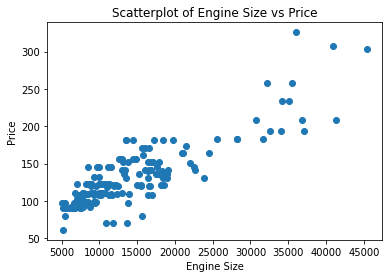

In [ ]:
import matplotlib.pyplot as plt
y = df['engine-size']
x = df['price']
plt.scatter(x,y)
plt.title('Scatterplot of Engine Size vs Price')
plt.xlabel("Engine Size")
plt.ylabel("Price")

**Câu 5. Tìm các feature có correlation so với price có ảnh hưởng nhiều nhất (đồng thuận, hoặc không đồng thuận)**

In [ ]:
from scipy import stats
name_column_has_the_best_correlation = ''
name_column_has_the_worth_correlation = ''
max_of_columns_has_the_best_correlation = -9999
min_of_columns_has_the_worth_correlation = 9999
for column_name in df.columns:
    if column_name != 'price' and df[column_name].dtypes != 'object':
        pearson_coef, p_value = stats.pearsonr(df[column_name], df['price'])
        if name_column_has_the_best_correlation == '' or max_of_columns_has_the_best_correlation < pearson_coef:
            name_column_has_the_best_correlation = column_name
            max_of_columns_has_the_best_correlation = pearson_coef
        if name_column_has_the_worth_correlation == '' or min_of_columns_has_the_worth_correlation > pearson_coef:
            name_column_has_the_worth_correlation = column_name
            min_of_columns_has_the_worth_correlation = pearson_coef
        
print("Thuộc tính có ảnh hưởng đồng thuận nhiều nhất " + name_column_has_the_best_correlation + " với correlation là ", \
      max_of_columns_has_the_best_correlation)
print("Thuộc tính có ảnh hưởng không đồng thuận nhiều nhất " + name_column_has_the_worth_correlation + " với correlation là ", \
      min_of_columns_has_the_worth_correlation)

Thuộc tính có ảnh hưởng đồng thuận nhiều nhất engine-size với correlation là  0.8723351674455185
Thuộc tính có ảnh hưởng không đồng thuận nhiều nhất highway-mpg với correlation là  -0.704692265058953


**Câu 6. Dùng seaborn để phát họa các regplot cho các feature đã tìm thấy.**

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(0.0, 53277.30155493948)

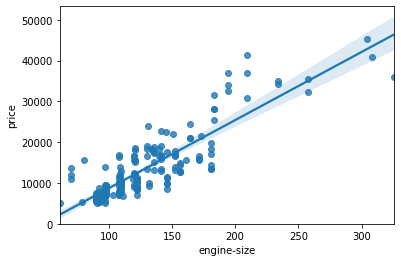

In [ ]:
sns.regplot(x = name_column_has_the_best_correlation, y = 'price', data=df)
plt.ylim(0,)

(0.0, 48172.47368155226)

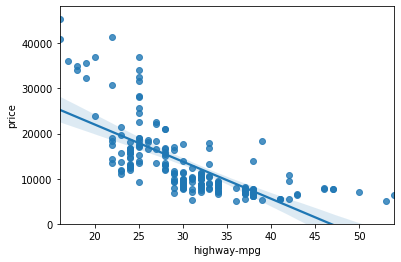

In [ ]:
sns.regplot(x = name_column_has_the_worth_correlation, y = 'price', data=df)
plt.ylim(0,)

**Câu 7. Biến &#39;body-style&#39; là loại biến gì? Nếu là category thì đếm số lượng cho mỗi value. Kết quả trả về là một df với index là các value.**

In [ ]:
print("Loại biến của body-style là ", df['body-style'].dtypes)

Loại biến của body-style là  object


In [ ]:
if df['body-style'].dtypes == 'object':
    print("Số lượng của mỗi values là ")
    df_body_style_pivot = df['body-style'].value_counts()
    print(df_body_style_pivot)

Số lượng của mỗi values là 
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64


**Câu 8. Phát họa các boxplot biểu diễn &#39;body-style&#39; theo price.**

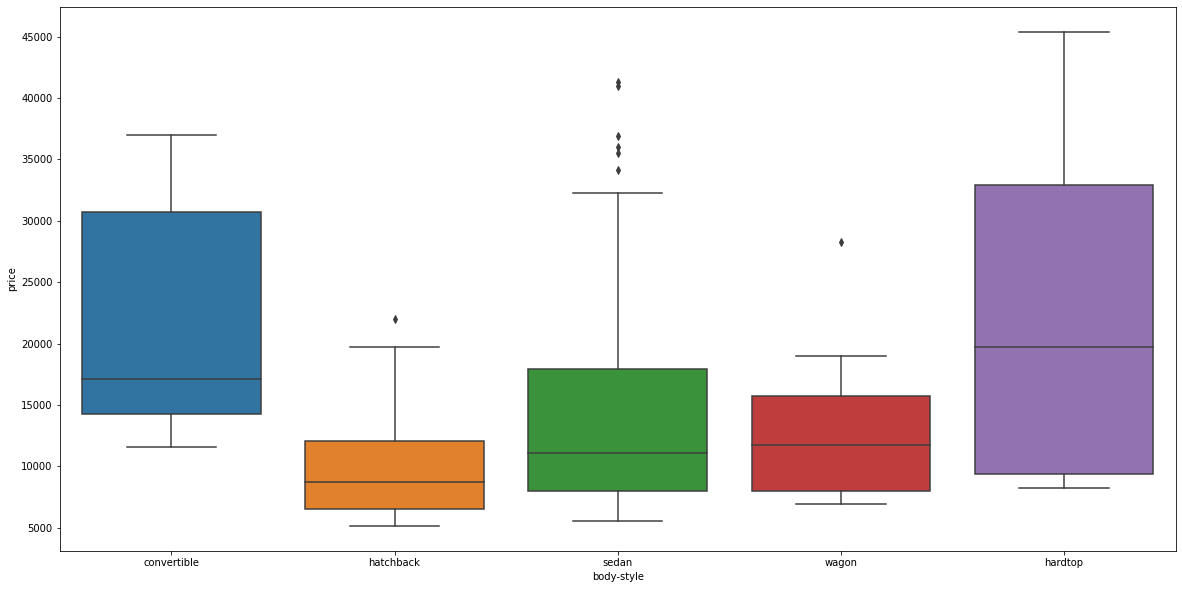

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'body-style', y ='price', data=df)

**Câu 9. Viết hàm trích lọc các sample nằm trong miền biến thiên về giá theo các giá trị trong &#39;body-style&#39;.**

In [13]:
q1 = df[['price','body-style']].groupby('body-style').quantile(0.25)
q3 = df[['price','body-style']].groupby('body-style').quantile(0.75)

In [31]:
df_by_body_style = pd.DataFrame()
for i in range(len(q1)):
    df_by_body_style = df_by_body_style.append(df.loc[(df['price'] >= q1.iloc[i][0]) & (df['price'] <= q3.iloc[i][0])])

In [43]:
df_by_body_style.drop_duplicates()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500,11.190476,Medium,0,1
168,2,134,toyota,std,two,convertible,rwd,front,98.4,0.846708,0.911111,53.0,2975,ohc,four,146,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30,17669,9.791667,Medium,0,1
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495,11.190476,Medium,0,1
185,3,122,volkswagen,std,two,convertible,fwd,front,94.5,0.765497,0.891667,55.6,2254,ohc,four,109,mpfi,3.19,3.40,8.5,90.0,5500.0,24,29,11595,9.791667,Low,0,1
163,2,134,toyota,std,two,hardtop,rwd,front,98.4,0.846708,0.911111,52.0,2540,ohc,four,146,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30,8449,9.791667,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,1,103,nissan,std,four,wagon,fwd,front,94.5,0.817876,0.886111,53.5,2024,ohc,four,97,2bbl,3.15,3.29,9.4,69.0,5200.0,31,37,7349,7.580645,Low,0,1
94,1,103,nissan,std,four,wagon,fwd,front,94.5,0.817876,0.886111,53.5,2037,ohc,four,97,2bbl,3.15,3.29,9.4,69.0,5200.0,31,37,7999,7.580645,Low,0,1
150,0,81,toyota,std,four,wagon,4wd,front,95.7,0.815473,0.883333,59.1,2290,ohc,four,92,2bbl,3.05,3.03,9.0,62.0,4800.0,27,32,7898,8.703704,Low,0,1
149,0,77,toyota,std,four,wagon,fwd,front,95.7,0.815473,0.883333,59.1,2280,ohc,four,92,2bbl,3.05,3.03,9.0,62.0,4800.0,31,37,6918,7.580645,Low,0,1


**Câu 10. Căn cứ vào giá xe, chúng ta có thể nhận xét gì về các nhóm giá trị trong “engine-location”**

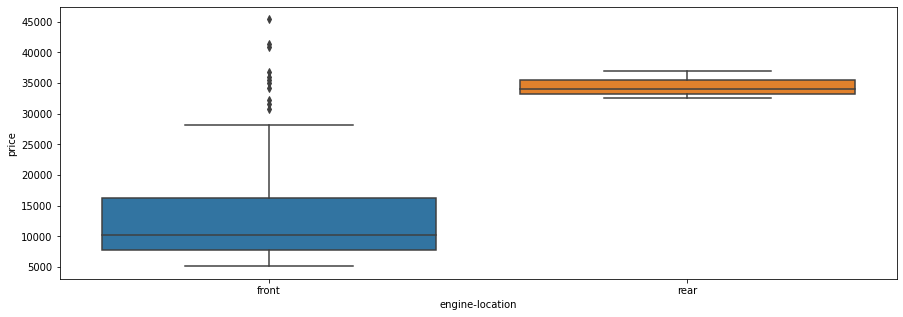

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x = 'engine-location', y ='price', data=df)

**Nhận xét:**
Engine-location: Vị trí đặt máy
Giá tiền với vị trí đặt máy là rear cao hơn giá trị với vị trí đặt máy là front hay vị trí đặt máy có ảnh hưởng đến giá tiền của một chiếc xe.
Phần lớn giá tiền có vị trí đặt máy là rear thường có giá thành cao nên được sản xuất hay mua ít hơn rất nhiều so với front.

**Câu 11. Tạo groupby các feature = [&#39;drive-wheels&#39;,&#39;body-style&#39;] theo trung bình giá (biến &#39;price&#39;). Nhận xét xem bị khuyết nhóm nào?**

In [ ]:
df_grb_price = df[['drive-wheels', 'body-style', 'price']].groupby(['drive-wheels', 'body-style']).mean()
df_grb_price

price
drive-wheels body-style               
4wd          hatchback     7603.000000
             sedan        12647.333333
             wagon         9095.750000
fwd          convertible  11595.000000
             hardtop       8249.000000
             hatchback     8396.387755
             sedan         9811.800000
             wagon         9997.333333
rwd          convertible  23949.600000
             hardtop      24202.714286
             hatchback    14337.777778
             sedan        21711.833333
             wagon        16994.222222

**Nhận xét:**
Nhóm bị thiếu là 4wd và hardtop, 4wd và convertible.

**Câu 12. Tạo bảng bảng pivot thể hiện trung bình giá, với index dòng là &#39;drive-wheels&#39;, index cột là &#39;body-style&#39;.**

In [ ]:
df_grb_price = df[['drive-wheels', 'body-style', 'price']].groupby(['drive-wheels', 'body-style']).mean()
df_grb_price

price
drive-wheels body-style               
4wd          hatchback     7603.000000
             sedan        12647.333333
             wagon         9095.750000
fwd          convertible  11595.000000
             hardtop       8249.000000
             hatchback     8396.387755
             sedan         9811.800000
             wagon         9997.333333
rwd          convertible  23949.600000
             hardtop      24202.714286
             hatchback    14337.777778
             sedan        21711.833333
             wagon        16994.222222

**Câu 13. Tạo heatmap thể hiện câu 12 (dùng mã màu là cmap=&#39;RdBu')**

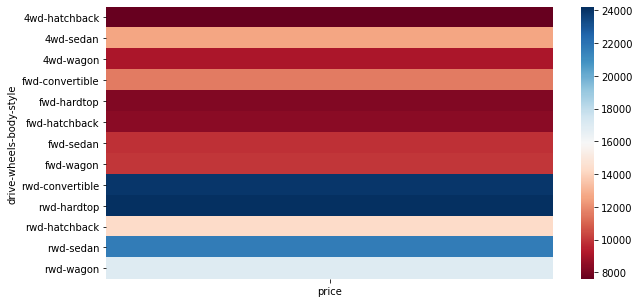

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df_grb_price, cmap = 'RdBu')
plt.show()

**Câu 14. Tính Pearson_correlation và P-value của &#39;wheel-base&#39; và &#39;price&#39; đưa ra kết luận nhận xét.**

In [ ]:
from scipy import stats
Pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("P_value = ", p_value)
print("Pearson_correlation = ",pearson_coef)

P_value =  8.076488270733218e-20
Pearson_correlation =  -0.11032556467564852


**Nhận xét:**
Pearson_correlation thuộc trong khoảng (0; -0.3) -> Không có tương quan. </br>
P_value < 0.001 -> Kết quả chắc chắn.

**Câu 15. Tính Pearson_correlation và P-value của &#39;length&#39; và &#39;price&#39; đưa ra kết luận nhận xét.**

In [ ]:
from scipy import stats
Pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("P_value = ", p_value)
print("Pearson_correlation = ",pearson_coef)

P_value =  8.01647628992934e-30
Pearson_correlation =  -0.11032556467564852


**Nhận xét:**
Pearson_correlation thuộc trong khoảng (0; -0.3) -> Không có tương quan. </br>
P_value < 0.001 -> Kết quả chắc chắn.

**Câu 16. Tiếp tục phân tích thăm dò các feature còn lại, theo anh/chị những feature nào có ảnh hưởng nhất đến giá xe? Anh/chị tạo df và lưu trữ nó.**

In [51]:
categorical_features = []
for column in df.columns:
    if df[column].dtypes == 'object':
        categorical_features.append(column)

In [55]:
categorical_features

['make',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system',
 'horsepower-binned']

In [65]:
categorical_df = df[['make',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system',
 'horsepower-binned']]
from sklearn.preprocessing import LabelEncoder
categorical_df = categorical_df.apply(LabelEncoder().fit_transform)

In [69]:
X = categorical_df.values
Y  = df['price'].values

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state =0)

In [92]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

regressor = DecisionTreeRegressor(random_state=0)
for i in range(X.shape[1]):
    regressor.fit(X_train[:, i].reshape(-1,1), Y_train)
    y_pred = regressor.predict(X_test[:, i].reshape(-1,1))
    print(r2_score(Y_test, y_pred), categorical_features[i])

0.8139217857658976 make
-0.13004489938561048 aspiration
-0.022379479681991388 num-of-doors
0.16301793301721068 body-style
0.38774152053623934 drive-wheels
0.2793532193971392 engine-location
-0.06675818853477011 engine-type
0.4922548538718199 num-of-cylinders
0.19182124185772753 fuel-system
0.6598071923713887 horsepower-binned


Chọn những thuộc tính phân loại có dự đoán trên (xấp xỉ) 0.5 là make, num-of-cylinders, horsepower-binned.

In [94]:
df_new_features = df[['make', 'num-of-cylinders', 'horsepower-binned', 'symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke','compression-ratio','horsepower', 'peak-rpm','city-mpg','highway-mpg','city-L/100km','diesel','gas']]